<a href="https://colab.research.google.com/github/Jakondo/NN-and-Comp-Vision/blob/master/5.5_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
import torchvision.datasets

In [4]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20514844.26it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 331285.97it/s]
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5266052.06it/s]                           
8192it [00:00, 131640.45it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [6]:
len(y_train), len(y_test)

(60000, 10000)

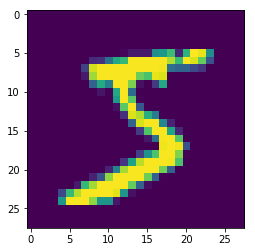

tensor(5)


In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [0]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [9]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
    self.act2 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.fc1 = torch.nn.Linear(5*5*16, 120)
    self.act3 = torch.nn.Tanh()
    
    self.fc2 = torch.nn.Linear(120, 84)
    self.act4 = torch.nn.Tanh()
    
    self.fc3 = torch.nn.Linear(84, 10)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)
    
    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)
    
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    
    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)
    
    return(x)

lenet5 = LeNet5()

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [17]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    
    batch_indexes = order[start_index:start_index+batch_size]
    
    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)
    
    preds = lenet5.forward(X_batch)
    
    loss_value = loss(preds, y_batch)
    loss_value.backward()
    
    optimizer.step()
  
  test_preds = lenet5.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test).data.cpu())
  
  accuracy = (test_preds.argmax(dim=1)==y_test).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)
  
  print(accuracy)

tensor(0.9745)
tensor(0.9797)
tensor(0.9862)
tensor(0.9862)
tensor(0.9869)
tensor(0.9883)
tensor(0.9895)
tensor(0.9876)
tensor(0.9862)
tensor(0.9875)


KeyboardInterrupt: ignored

In [18]:
lenet5.forward(X_test)

tensor([[-2.9732,  0.8398,  0.3305,  ..., 14.5600, -3.3231,  1.6836],
        [ 0.5466,  1.7259, 15.1844,  ..., -2.5108,  0.7225, -4.3343],
        [-3.3107, 13.9323, -0.5061,  ...,  3.2492, -1.0402, -3.9641],
        ...,
        [-3.8281, -0.7844, -2.3094,  ...,  1.0256,  0.6686,  1.4006],
        [ 0.3787, -2.7729, -7.4435,  ..., -2.8846,  6.1753, -1.4381],
        [ 0.8389, -2.6841,  0.5903,  ..., -8.6588, -2.5310, -2.8232]],
       device='cuda:0', grad_fn=<AddmmBackward>)

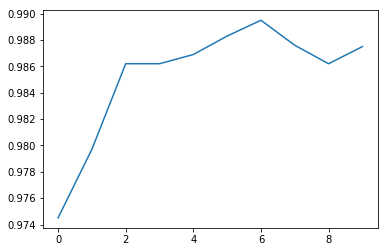

In [19]:
plt.plot(test_accuracy_history)

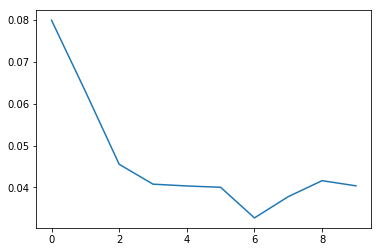

In [20]:
plt.plot(test_loss_history)